In [2]:
# from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2 ##STrAdaBoost.R2
# from TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2 ##two-stage TrAdaBoost.R2

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

#Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
import matplotlib.lines as mlines

import statistics 

from scipy.stats import rv_continuous
from scipy.stats import *

from statistics import mean
from sklearn.cluster import KMeans
from scipy.spatial import distance


######### Instance Transfer repositories ####################
from adapt.instance_based import TwoStageTrAdaBoostR2

print("Repositories uploaded!!")

Repositories uploaded!!


In [3]:
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2
from sklearn.model_selection import GridSearchCV
from adapt.instance_based import KMM

print("Second Upload Completed!!")

Second Upload Completed!!


In [222]:
################################### Concrete ###########################################################################################################
target_column_concrete = ['ConcreteCompressiveStrength']
ConcreteData_df = pd.read_excel('UCI_regression/Concrete/Concrete_Data.xls') ## 'Cement' found to be correlated at 0.4 :: 100
print("Concrete Data")
print("-------------------------------------------")
print(ConcreteData_df.shape)

concrete_df_y = ConcreteData_df[target_column_concrete]
concrete_df_X = ConcreteData_df.drop(target_column_concrete, axis = 1)

ConcreteData_df.columns

Concrete Data
-------------------------------------------
(1030, 9)


Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [6]:
## Get Entropy Concrete
entropy_concrete = entropy(ConcreteData_df)
entropy_concrete

array([6.86922769, 6.16753072, 6.09706277, 6.93037381, 6.38141958,
       6.93411207, 6.93187261, 6.33603673, 6.8252345 ])

In [90]:
## Get the Spearman Correlation Concrete
corr_concrete =  ConcreteData_df.corr(method = 'spearman')['ConcreteCompressiveStrength'].abs()
corr_concrete = corr_concrete.sort_values(ascending = True)
corr_concrete

sumval_concrete = corr_concrete.sum()/len(corr_concrete)
sumval_concrete

## 0% simple (>0.8)
## 0% simple (>0.6)

0.3703907947964364

In [11]:
## Get the Spearman Correlation Concrete for the features
corr_concrete =  concrete_df_X.corr(method = 'spearman')
corr_concrete

corr_concrete_lsum = np.tril(corr_concrete).sum() - np.trace(corr_concrete)
concrete_elems = len(corr_concrete) * (len(corr_concrete) - 1) / 2
corr_concrete_lavg = abs(corr_concrete_lsum / concrete_elems)
corr_concrete_lavg

0.10444626994175524

In [10]:
## Get the L1 parameter Concrete
from sklearn import linear_model

regr_concrete = linear_model.LinearRegression()
regr_concrete.fit(concrete_df_X, concrete_df_y)
predict_concrete = regr_concrete.predict(concrete_df_X)

concrete_df_y_list = concrete_df_y.to_numpy()
mandis_concrete = np.abs(concrete_df_y_list - predict_concrete)
L1_concrete = np.sum(mandis_concrete)/len(mandis_concrete)
L1_concrete


8.214899392828647

In [20]:
## Collective Feature Efficiency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


target_column_concrete = ['ConcreteCompressiveStrength']

Corr_y = ConcreteData_df.corr()['ConcreteCompressiveStrength'].abs().sort_values(ascending = True)
closepair_df = ConcreteData_df[['Cement', 'ConcreteCompressiveStrength']]

closepair_df_y = closepair_df[target_column_concrete]
closepair_df_X = closepair_df.drop(target_column_concrete, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
standardized_residuals = influence_linear.resid_studentized_internal

ConcreteData_df = ConcreteData_df.drop(['Cement'], axis = 1)
ConcreteData_df['Residuals'] = standardized_residuals

ConcreteData_df = ConcreteData_df[abs(ConcreteData_df.Residuals)  > 0.1]
ConcreteData_df

# linear_reg_concrete = LinearRegression().fit(closepair_df_X, closepair_df_y)
# pred_linear_concrete = linear_reg.predict(closepair_df_X)


,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength,Residuals
0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,1.631719
1,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.378786
4,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,1.038994
5,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847,0.857170
7,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770,-0.499601
...,...,...,...,...,...,...,...,...,...
1025,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,0.610542
1026,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,-0.545618
1027,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,-0.108017
1028,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,0.460269


In [171]:
## Distance from Linear Function
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

target_column_concrete = ['ConcreteCompressiveStrength']

closepair_df_y = ConcreteData_df[target_column_concrete]
closepair_df_X = ConcreteData_df.drop(target_column_concrete, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
std_res = influence_linear.resid_studentized_internal
std_res_abs = [abs(x) for x in std_res]

ratio = 1
for i in std_res_abs:
    ratio = ratio - float(i)/len(std_res_abs)  
    
ratio

0.20618256026520188

In [223]:
## Input Distribution
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

ConcreteData_df_sort = ConcreteData_df.sort_values('ConcreteCompressiveStrength')
print(ConcreteData_df_sort.shape)

target_column_concrete = ['ConcreteCompressiveStrength']

ConcreteData_df_sort_X = ConcreteData_df_sort.drop(target_column_concrete, axis = 1)
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(ConcreteData_df_sort_X) 
ConcreteData_df_sort_X.loc[:,:] = scaled_values

euclidean_pair_consec = np.linalg.norm(ConcreteData_df_sort_X.diff(axis=0).drop(0), axis=1)
euclidean_pair_consec = [x for x in euclidean_pair_consec if math.isnan(x) == False]

len(euclidean_pair_consec)
input_dist = sum(euclidean_pair_consec)/float(ConcreteData_df_sort_X.shape[0])
input_dist

(1030, 9)


0.7198972540487869

In [46]:
# ConcreteData_df = ConcreteData_df.drop(['Residuals'], axis = 1)

target_column_concrete = ['ConcreteCompressiveStrength']

Corr_y = ConcreteData_df.corr()['ConcreteCompressiveStrength'].abs().sort_values(ascending = True)
Corr_y
closepair_df = ConcreteData_df[['FlyAsh', 'ConcreteCompressiveStrength']]

closepair_df_y = closepair_df[target_column_concrete]
closepair_df_X = closepair_df.drop(target_column_concrete, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
standardized_residuals = influence_linear.resid_studentized_internal

ConcreteData_df = ConcreteData_df.drop(['FlyAsh'], axis = 1)
ConcreteData_df['Residuals'] = standardized_residuals

ConcreteData_df = ConcreteData_df[abs(ConcreteData_df.Residuals)  > 0.1]
ConcreteData_df

,ConcreteCompressiveStrength,Residuals
0,79.986111,2.131597
1,61.887366,1.220355
4,44.296075,0.334662
5,47.029847,0.472303
8,45.854291,0.413115
...,...,...
1016,15.091251,-0.779398
1020,42.140084,0.226111
1025,44.284354,0.495907
1027,23.696601,-0.507717


In [224]:
################################### Housing ################################################################
HousingData_df = pd.read_csv('UCI_regression/BostonHousing/BostonHousing.csv') 
print("Housing Data")
print("---------------------------")
print(HousingData_df.shape)

target_column_housing = ['medv']
HousingData_df_y = HousingData_df[target_column_housing]
HousingData_df_X = HousingData_df.drop(target_column_housing, axis = 1)

HousingData_df.columns


Housing Data
---------------------------
(506, 14)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [14]:
## Get Entropy Housing
entropy_housing = entropy(HousingData_df)
entropy_housing

array([4.86837097, 4.71732544, 6.02606388, 3.55534806, 6.20547279,
       6.22032961, 6.12673135, 6.08397546, 5.86043414, 6.14553124,
       6.21940643, 6.17532214, 6.07395666, 6.14828567])

In [89]:
## Get the Spearman Correlation Housing
corr_housing =  HousingData_df.corr(method = 'spearman')['medv'].abs()
corr_housing = corr_housing.sort_values(ascending = True)
corr_housing

sumval_housing = corr_housing.sum()/len(corr_housing)
sumval_housing

## 7.6% simple (>0.8)
## 15.3% simple (>0.6)

0.5292293626047331

In [14]:
## Get the Spearman Correlation Housing for the features
corr_housing =  HousingData_df_X.corr(method = 'spearman')
corr_housing

corr_housing_lsum = np.tril(corr_housing).sum() - np.trace(corr_housing)
housing_elems = len(corr_housing) * (len(corr_housing) - 1) / 2
corr_housing_lavg = abs(corr_housing_lsum / housing_elems)
corr_housing_lavg

0.053822519683534936

In [16]:
## Get the L1 parameter Housing
from sklearn import linear_model

regr_housing = linear_model.LinearRegression()
regr_housing.fit(HousingData_df_X, HousingData_df_y)
predict_housing = regr_housing.predict(HousingData_df_X)

housing_df_y_list = HousingData_df_y.to_numpy()
mandis_housing = np.abs(housing_df_y_list - predict_housing)
L1_housing = np.sum(mandis_housing)/len(mandis_housing)
L1_housing

3.2708628109003177

In [107]:
## Collective Feature Efficiency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

HousingData_df = HousingData_df.drop(['Residuals'], axis = 1)

target_column_housing = ['medv']

Corr_y = HousingData_df.corr()['medv'].abs().sort_values(ascending = True)
Corr_y
closepair_df = HousingData_df[['dis', 'medv']]

closepair_df_y = closepair_df[target_column_housing]
closepair_df_X = closepair_df.drop(target_column_housing, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
standardized_residuals = influence_linear.resid_studentized_internal

HousingData_df = HousingData_df.drop(['dis'], axis = 1)
HousingData_df['Residuals'] = standardized_residuals

HousingData_df = HousingData_df[abs(HousingData_df.Residuals)  > 0.1]
HousingData_df

In [174]:
## Distance from Linear Function
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

target_column_housing = ['medv']

closepair_df_y = HousingData_df[target_column_housing]
closepair_df_X = HousingData_df.drop(target_column_housing, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
std_res = influence_linear.resid_studentized_internal
std_res_abs = [abs(x) for x in std_res]

ratio = 1
for i in std_res_abs:
    ratio = ratio - float(i)/len(std_res_abs)  
    
ratio

0.29908986791567527

In [225]:
## Input Distribution
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

HousingData_df_sort = HousingData_df.sort_values('medv')
print(HousingData_df_sort.shape)

target_column_housing = ['medv']

HousingData_df_sort_X = HousingData_df_sort.drop(target_column_housing, axis = 1)
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(HousingData_df_sort_X) 
HousingData_df_sort_X.loc[:,:] = scaled_values

euclidean_pair_consec = np.linalg.norm(HousingData_df_sort_X.diff(axis=0).drop(0), axis=1)
euclidean_pair_consec = [x for x in euclidean_pair_consec if math.isnan(x) == False]

len(euclidean_pair_consec)
input_dist = sum(euclidean_pair_consec)/float(HousingData_df_sort_X.shape[0])
input_dist

(506, 14)


0.9021480317169385

In [226]:
######################################################## Automobile ################################################################
print("Automobile Data")
print("---------------------------")
dropcol_initial_auto = ['name']
AutoData_df = pd.read_csv('UCI_regression/MPG/Auto.csv') ## horsepower column has correlation 0.4 :: [46 - 230] :: 30
AutoData_df = AutoData_df.drop(dropcol_initial_auto, axis = 1)
print("The shape of the Input data is: ", AutoData_df.shape)

target_column_auto = ['mpg']

AutoData_df_y = AutoData_df[target_column_auto]
AutoData_df_X = AutoData_df.drop(target_column_auto, axis = 1)

AutoData_df.columns

Automobile Data
---------------------------
The shape of the Input data is:  (392, 8)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [19]:
## Get Entropy Auto
entropy_auto = entropy(AutoData_df)
entropy_auto

array([5.91655392, 5.92424156, 5.83322921, 5.9085298 , 5.93161924,
       5.95554068, 5.97008906, 5.85263873])

In [88]:
## Get the Spearman Correlation Auto
corr_auto =  AutoData_df.corr(method = 'spearman')['mpg'].abs()
corr_auto = corr_auto.sort_values(ascending = True)
corr_auto

sumval_auto = corr_auto.sum()/len(corr_auto)
sumval_auto

## 57% simple (>0.8)
## 57% simple (>0.6)

0.7505589879419527

In [16]:
## Get the Spearman Correlation Auto for the features
corr_auto =  AutoData_df_X.corr(method = 'spearman')
corr_auto

corr_auto_lsum = np.tril(corr_auto).sum() - np.trace(corr_auto)
auto_elems = len(corr_auto) * (len(corr_auto) - 1) / 2
corr_auto_lavg = abs(corr_auto_lsum / auto_elems)
corr_auto_lavg

0.008094763976858784

In [23]:
## Get the L1 parameter Auto
from sklearn import linear_model

regr_auto = linear_model.LinearRegression()
regr_auto.fit(AutoData_df_X, AutoData_df_y)
predict_auto = regr_auto.predict(AutoData_df_X)

AutoData_df_y_list = AutoData_df_y.to_numpy()
mandis_auto = np.abs(AutoData_df_y_list - predict_auto)
L1_auto = np.sum(mandis_auto)/len(mandis_auto)
L1_auto

2.4993098325008716

In [67]:
## Collective Feature Efficiency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# AutoData_df = AutoData_df.drop(['Residuals'], axis = 1)

target_column_auto = ['mpg']

Corr_y = AutoData_df.corr()['mpg'].abs().sort_values(ascending = True)
Corr_y
closepair_df = AutoData_df[['acceleration', 'mpg']]

closepair_df_y = closepair_df[target_column_auto]
closepair_df_X = closepair_df.drop(target_column_auto, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
standardized_residuals = influence_linear.resid_studentized_internal

AutoData_df = AutoData_df.drop(['acceleration'], axis = 1)
AutoData_df['Residuals'] = standardized_residuals

AutoData_df = AutoData_df[abs(AutoData_df.Residuals)  > 0.1]
AutoData_df


,mpg,Residuals
0,18.0,-0.230596
1,15.0,-0.529800
5,15.0,-0.317425
9,15.0,-0.103325
10,15.0,-0.317425
...,...,...
381,38.0,1.517670
385,36.0,1.842228
386,27.0,0.123902
388,44.0,1.204596


In [176]:
## Distance from Linear Function
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

target_column_auto = ['mpg']

closepair_df_y = AutoData_df[target_column_auto]
closepair_df_X = AutoData_df.drop(target_column_auto, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
std_res = influence_linear.resid_studentized_internal
std_res_abs = [abs(x) for x in std_res]

ratio = 1
for i in std_res_abs:
    ratio = ratio - float(i)/len(std_res_abs)  
    
ratio

0.24043937249727487

In [227]:
## Input Distribution
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

AutoData_df_sort = AutoData_df.sort_values('mpg')
print(AutoData_df_sort.shape)

target_column_auto = ['mpg']

AutoData_df_sort_X = AutoData_df_sort.drop(target_column_auto, axis = 1)
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(AutoData_df_sort_X) 
AutoData_df_sort_X.loc[:,:] = scaled_values

euclidean_pair_consec = np.linalg.norm(AutoData_df_sort_X.diff(axis=0).drop(0), axis=1)
euclidean_pair_consec = [x for x in euclidean_pair_consec if math.isnan(x) == False]

len(euclidean_pair_consec)
input_dist = sum(euclidean_pair_consec)/float(AutoData_df_sort_X.shape[0])
input_dist

(392, 8)


0.5897347838735368

In [101]:
################################################################ Ailerons ###############################################
print("Ailerons Data")
print("-------------------------------------------")


target_ailerons = ['goal']
colnames_ailerons = ['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll', 'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1',
            'SeTime2', 'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8', 'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 
            'SeTime13', 'SeTime14', 'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4', 'diffSeTime5', 'diffSeTime6', 'diffSeTime7',
            'diffSeTime8', 'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12', 'diffSeTime13', 'diffSeTime14', 'alpha', 'Se', 'goal']
AileronsData_train_df = pd.read_csv('UCI_regression/Ailerons/ailerons.data', header = None, names = colnames_ailerons) 
# print(AileronsData_df_train.shape)

AileronsData_test_df = pd.read_csv('UCI_regression/Ailerons/ailerons.test', header = None, names = colnames_ailerons) 
# print(AileronsData_df_test.shape)

AileronsData_train_df_y = AileronsData_train_df[target_ailerons]
AileronsData_train_df_X = AileronsData_train_df.drop(target_ailerons, axis = 1)

AileronsData_train_df.shape

Ailerons Data
-------------------------------------------


(7154, 41)

In [27]:
## Get Entropy Ailerons
entropy_ailerons = entropy(AileronsData_train_df)
entropy_ailerons

/Users/shrey/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: divide by zero encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/Users/shrey/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


array([      -inf,       -inf,       -inf,       -inf,       -inf,
             -inf, 8.80691841,       -inf,       -inf,       -inf,
       8.8315046 , 8.83126288, 8.83126288, 8.83121856, 8.83121697,
       8.83117994, 8.83117394, 8.83118849, 8.83119159, 8.83106317,
       8.83106452, 8.83094737, 8.83095125, 8.83092714,       -inf,
              nan,       -inf, 0.        ,       -inf, 0.50040242,
             -inf,        nan,       -inf,       -inf,       -inf,
             -inf,       -inf, 0.69314718, 8.83117899, 8.83092714,
       8.7747889 ])

In [87]:
## Get the Spearman Correlation Ailerons
corr_ailerons =  AileronsData_train_df.corr(method = 'spearman')['goal'].abs()
corr_ailerons = corr_ailerons.sort_values(ascending = True)
corr_ailerons = corr_ailerons[:-1]
corr_ailerons

sumval_ailerons = corr_ailerons.sum()/len(corr_ailerons)
sumval_ailerons


## 0% simple (>0.8)
## 0% simple (>0.6)

0.3217586099480845

In [37]:
## Get the Spearman Correlation Ailerons for the features
AileronsData_train_df_X = AileronsData_train_df_X.drop(['diffSeTime2'], axis = 1)
corr_ailerons =  AileronsData_train_df_X.corr(method = 'spearman')
corr_ailerons

corr_ailerons_lsum = np.tril(corr_ailerons).sum() - np.trace(corr_ailerons)

ailerons_elems = len(corr_ailerons) * (len(corr_ailerons) - 1) / 2
corr_ailerons_lavg = abs(corr_ailerons_lsum / ailerons_elems)
corr_ailerons_lavg

0.15845264476831053

In [35]:
from sklearn import linear_model

regr_ailerons = linear_model.LinearRegression()
regr_ailerons.fit(AileronsData_train_df_X, AileronsData_train_df_y)
predict_ailerons = regr_ailerons.predict(AileronsData_train_df_X)

AileronsData_train_df_y_list = AileronsData_train_df_y.to_numpy()
mandis_ailerons = np.abs(AileronsData_train_df_y_list - predict_ailerons)
L1_ailerons = np.sum(mandis_ailerons)/len(mandis_ailerons)
L1_ailerons


0.00012685091380807255

In [98]:
## Collective Feature Efficiency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

target_column_ailerons = ['goal']

AileronsData_train_df = AileronsData_train_df.drop(['Residuals'], axis = 1)
Corr_y = AileronsData_train_df.corr()['goal'].abs().sort_values(ascending = True)
Corr_y

# closepair_df = AileronsData_train_df[['diffSeTime12', 'goal']]
# closepair_df_y = closepair_df[target_column_ailerons]
# closepair_df_X = closepair_df.drop(target_column_ailerons, axis = 1)

# x_const = sm.add_constant(closepair_df_X)
# linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
# influence_linear = linear_reg.get_influence()
# standardized_residuals = influence_linear.resid_studentized_internal

# AileronsData_train_df = AileronsData_train_df.drop(['diffSeTime12'], axis = 1)
# AileronsData_train_df['Residuals'] = standardized_residuals

# AileronsData_train_df = AileronsData_train_df[abs(AileronsData_train_df.Residuals)  > 0.1]
# AileronsData_train_df

goal           1.0
diffSeTime2    NaN
diffSeTime4    NaN
diffSeTime6    NaN
Name: goal, dtype: float64

In [99]:
res = (795 + 586 + 17 + 26 + 62 + 0 + 22 + 0 + 23 + 0 + 29 + 0 + 30 + 0 + 37 + 0 + 171 + 375 + 358 + 284 + 223 + 151 + 110 + 37 + 20 + 16 + 3 + 6 + 1 + 3
      + 0 + 0 + 1 + 0 + 0 + 0 + 0 + 0 + 0 + 0)/float(7154)
res

0.47330164942689407

In [108]:
## Distance from Linear Function
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math

target_column_ailerons = ['goal']

closepair_df_y = AileronsData_train_df[target_column_ailerons]
closepair_df_X = AileronsData_train_df.drop(target_column_ailerons, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
std_res = influence_linear.resid_studentized_internal
std_res_abs = [abs(x) for x in std_res]
# print(std_res)

ratio = 1
for i in std_res_abs:
    if math.isnan(i) is False:
        ratio = ratio - float(i)/len(std_res_abs)  
    
ratio

0.2668927403644471

In [110]:
## Input Distribution
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

AileronsData_train_df_sort = AileronsData_train_df.sort_values('goal')
print(AileronsData_train_df_sort.shape)

target_column_ailerons = ['goal']

AileronsData_train_df_sort_X = AileronsData_train_df_sort.drop(target_column_ailerons, axis = 1)
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(AileronsData_train_df_sort_X) 
AileronsData_train_df_sort_X.loc[:,:] = scaled_values

euclidean_pair_consec = np.linalg.norm(AileronsData_train_df_sort_X.diff(axis=0).drop(0), axis=1)
euclidean_pair_consec = [x for x in euclidean_pair_consec if math.isnan(x) == False]

input_dist = sum(euclidean_pair_consec)/float(AileronsData_train_df_sort_X.shape[0])
input_dist

(7154, 41)


0.6868697527730712

In [6]:
####################################### Elevators #########################################################
print("Elevators")
print("---------------------------")

target_elevators = ['Goal']
colnames_elevators = ['climbRate', 'Sgz', 'p', 'q', 'curRoll', 'absRoll', 'diffClb', 'diffRollRate', 'diffDiffClb', 'SaTime1', 'SaTime2', 
                      'SaTime3', 'SaTime4', 'diffSaTime1', 'diffSaTime2', 'diffSaTime3', 'diffSaTime4', 'Sa', 'Goal']
Elevators_train_df = pd.read_csv('UCI_regression/Elevators/elevators.data', header = None, names = colnames_elevators)
print("Elevators Data")
print(Elevators_train_df.shape)

Elevators_test_df = pd.read_csv('UCI_regression/Elevators/elevators.test', header = None, names = colnames_elevators)
print(Elevators_test_df.shape)

Elevators_train_df.dropna()
Elevators_train_df
# Elevators_train_df_y = Elevators_train_df[target_elevators]
# Elevators_train_df_X = Elevators_train_df.drop(target_elevators, axis = 1)

# Elevators_train_df.columns

Elevators
---------------------------
Elevators Data
(8752, 19)
(7847, 19)


,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime2,diffSaTime3,diffSaTime4,Sa,Goal
0,118,-55,-0.28,-0.08,-0.2,-11,11,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.031
1,390,-45,-0.06,-0.07,-0.6,-12,11,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,0.0,0.0,-0.0008,0.034
2,68,6,0.11,0.15,0.6,-10,-9,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,0.0,0.0,-0.0010,0.033
3,-358,-12,-0.20,0.13,-0.3,-11,-7,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.032
4,-411,-19,-0.18,0.02,-0.5,-11,-3,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8747,45,20,-0.02,0.07,-0.7,-9,-2,0.001,-1.5,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,0.0,0.0,-0.0005,0.017
8748,55,23,0.19,0.02,-0.3,-8,1,0.004,-0.1,-0.0004,-0.0004,-0.0004,-0.0004,0.0000,0.0,0.0,0.0,-0.0004,0.018
8749,-107,21,-0.17,0.04,0.0,-8,-3,-0.004,0.0,-0.0005,-0.0006,-0.0006,-0.0006,0.0000,0.0,0.0,0.0,-0.0006,0.017
8750,105,19,-0.10,-0.03,-0.7,-9,5,0.002,-0.1,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,0.0,0.0,-0.0005,0.018


In [23]:
## Get Entropy Elevators
entropy_elevators = entropy(Elevators_train_df)
entropy_elevators

/Users/shrey/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


array([      -inf,       -inf,       -inf,       -inf,       -inf,
       9.00731186,       -inf,       -inf,       -inf, 8.9453694 ,
       8.9433354 , 8.94332638, 8.94199044,       -inf, 0.        ,
             -inf,        nan, 8.94198058, 9.03414541])

In [39]:
## Get the Spearman Correlation
corr_elevators =  Elevators_train_df.corr(method = 'spearman')['Goal'].abs()
corr_elevators = corr_elevators.sort_values(ascending = True)
corr_elevators = corr_elevators[:-1]
corr_elevators

sumval_elevators = corr_elevators.sum()/len(corr_elevators)
sumval_elevators

## 0% simple (>0.8)
## 0% simple (>0.6)

0.287034664255778

In [44]:
## Get the Spearman Correlation Auto for the features
Elevators_train_df_X = Elevators_train_df_X.drop(['diffSaTime4'], axis = 1)
corr_elevators =  Elevators_train_df_X.corr(method = 'spearman')
corr_elevators

corr_elevators_lsum = np.tril(corr_elevators).sum() - np.trace(corr_elevators)
elevators_elems = len(corr_elevators) * (len(corr_elevators) - 1) / 2
corr_elevators_lavg = abs(corr_elevators_lsum / elevators_elems)
corr_elevators_lavg

0.08448968016243141

In [36]:
from sklearn import linear_model

regr_elevators = linear_model.LinearRegression()
regr_elevators.fit(Elevators_train_df_X, Elevators_train_df_y)
predict_elevators = regr_elevators.predict(Elevators_train_df_X)

Elevators_train_df_y_list = Elevators_train_df_y.to_numpy()
mandis_elevators = np.abs(Elevators_train_df_y_list - predict_elevators)
L1_elevators = np.sum(mandis_elevators)/len(mandis_elevators)
L1_elevators

0.001950331259306508

In [7]:
## Collective Feature Efficiency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Elevators_train_df = Elevators_train_df.drop(['Residuals'], axis = 1)

target_column_elevators = ['Goal']

Corr_y = Elevators_train_df.corr()['Goal'].abs().sort_values(ascending = True)
Corr_y
# closepair_df = Elevators_train_df[['diffSaTime3', 'Goal']]

# closepair_df_y = closepair_df[target_column_elevators]
# closepair_df_X = closepair_df.drop(target_column_elevators, axis = 1)

# x_const = sm.add_constant(closepair_df_X)
# linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
# influence_linear = linear_reg.get_influence()
# standardized_residuals = influence_linear.resid_studentized_internal

# Elevators_train_df = Elevators_train_df.drop(['diffSaTime3'], axis = 1)
# Elevators_train_df['Residuals'] = standardized_residuals

# Elevators_train_df = Elevators_train_df[abs(Elevators_train_df.Residuals)  > 0.1]
# Elevators_train_df

diffSaTime2     0.008155
diffSaTime3     0.019601
diffRollRate    0.032380
diffSaTime1     0.045142
Sgz             0.054617
diffDiffClb     0.065262
curRoll         0.074914
p               0.075193
diffClb         0.096297
climbRate       0.118730
q               0.307703
absRoll         0.382790
Sa              0.632127
SaTime4         0.632143
SaTime3         0.638642
SaTime2         0.638655
SaTime1         0.651617
Goal            1.000000
diffSaTime4          NaN
Name: Goal, dtype: float64

In [390]:
res = (975 + 193 + 0 + 78 + 1 + 777 + 491 + 370 + 284 + 201 + 101 + 40 + 37 + 22 + 45 + 5)/float(8752)
res

0.41361974405850094

In [179]:
## Distance from Linear Function
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

target_column_elevators = ['Goal']

closepair_df_y = Elevators_train_df[target_column_elevators]
closepair_df_X = Elevators_train_df.drop(target_column_elevators, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
std_res = influence_linear.resid_studentized_internal
std_res_abs = [abs(x) for x in std_res]

ratio = 1
for i in std_res_abs:
    ratio = ratio - float(i)/len(std_res_abs)  
    
ratio

0.326481279298307

In [230]:
## Input Distribution
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

Elevators_train_df_sort = Elevators_train_df.sort_values('Goal')
print(Elevators_train_df_sort.shape)

target_column_elevators = ['Goal']

Elevators_train_df_sort_X = Elevators_train_df_sort.drop(target_column_elevators, axis = 1)
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(Elevators_train_df_sort_X) 
Elevators_train_df_sort_X.loc[:,:] = scaled_values

euclidean_pair_consec = np.linalg.norm(Elevators_train_df_sort_X.diff(axis=0).drop(0), axis=1)
euclidean_pair_consec = [x for x in euclidean_pair_consec if math.isnan(x) == False]

input_dist = sum(euclidean_pair_consec)/float(Elevators_train_df_sort_X.shape[0])
input_dist

0.5959722476620078

In [241]:
################################### Abalone ###########################################
print("Abalone Data")
print("---------------------------")

target_var_abalone = ['Rings']
colnames_abalone = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
AbaloneData_df = pd.read_csv('UCI_regression/Abalone/abalone.data', header = None, names = colnames_abalone)

gender = {'M': 1,'F': 2, 'I': 3} 
AbaloneData_df.Sex = [gender[item] for item in AbaloneData_df.Sex] 

print(AbaloneData_df.shape)

target_column_abalone = ['Rings']

AbaloneData_df_y = AbaloneData_df[target_column_abalone]
AbaloneData_df_X = AbaloneData_df.drop(target_column_abalone, axis = 1)

AbaloneData_df.columns

Abalone Data
---------------------------
(4177, 9)


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [43]:
## Get Entropy Abalone
entropy_abalone = entropy(AbaloneData_df)
entropy_abalone

array([8.24464687, 8.30881122, 8.30506499, 8.29346748, 8.15203316,
       8.13996549, 8.1441803 , 8.15924304, 8.28746906])

In [83]:
## Get the Spearman Correlation Abalone
corr_abalone =  AbaloneData_df.corr(method = 'spearman')['Rings'].abs()
corr_abalone = corr_abalone.sort_values(ascending = True)
corr_abalone

sumval_abalone = corr_abalone.sum()/len(corr_abalone)
sumval_abalone


## 0% simple (>0.8)
## 75% simple (>0.6)

0.641097950716637

In [28]:
## Get the Spearman Correlation Abalone for the features
corr_abalone =  AbaloneData_df_X.corr(method = 'spearman')
corr_abalone

corr_abalone_lsum = np.tril(corr_abalone).sum() - np.trace(corr_abalone)
abalone_elems = len(corr_abalone) * (len(corr_abalone) - 1) / 2
corr_abalone_lavg = abs(corr_abalone_lsum / elevators_elems)
corr_abalone_lavg

0.107982683781241

In [45]:
from sklearn import linear_model

regr_abalone = linear_model.LinearRegression()
regr_abalone.fit(AbaloneData_df_X, AbaloneData_df_y)
predict_abalone = regr_abalone.predict(AbaloneData_df_X)

AbaloneData_df_y_list = AbaloneData_df_y.to_numpy()
mandis_abalone = np.abs(AbaloneData_df_y_list - predict_abalone)
L1_abalone = np.sum(mandis_abalone)/len(mandis_abalone)
L1_abalone

1.5843987714248777

In [134]:
## Collective Feature Efficiency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# AbaloneData_df = AbaloneData_df.drop(['Residuals'], axis = 1)

target_column_abalone = ['Rings']

Corr_y = AbaloneData_df.corr()['Rings'].abs().sort_values(ascending = True)
Corr_y
closepair_df = AbaloneData_df[['Sex', 'Rings']]

closepair_df_y = closepair_df[target_column_abalone]
closepair_df_X = closepair_df.drop(target_column_abalone, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
standardized_residuals = influence_linear.resid_studentized_internal

AbaloneData_df = AbaloneData_df.drop(['Sex'], axis = 1)
AbaloneData_df['Residuals'] = standardized_residuals

AbaloneData_df = AbaloneData_df[abs(AbaloneData_df.Residuals)  > 0.1]
AbaloneData_df

,Rings,Residuals
0,15,1.044303
1,7,-1.323057
2,9,-0.274760
3,10,-0.435297
6,20,2.979654
...,...,...
4166,10,0.477523
4168,8,-0.570616
4171,8,-1.027137
4174,9,-0.731217


In [181]:
## Distance from Linear Function
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

target_column_abalone = ['Rings']

closepair_df_y = AbaloneData_df[target_column_abalone]
closepair_df_X = AbaloneData_df.drop(target_column_abalone, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
std_res = influence_linear.resid_studentized_internal
std_res_abs = [abs(x) for x in std_res]

ratio = 1
for i in std_res_abs:
    ratio = ratio - float(i)/len(std_res_abs)  
    
ratio

0.27840395217504593

In [242]:
## Input Distribution
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

AbaloneData_df_sort = AbaloneData_df.sort_values('Rings')
print(AbaloneData_df_sort.shape)

target_column_abalone = ['Rings']

AbaloneData_df_sort_X = AbaloneData_df_sort.drop(target_column_abalone, axis = 1)
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(AbaloneData_df_sort_X) 
AbaloneData_df_sort_X.loc[:,:] = scaled_values

euclidean_pair_consec = np.linalg.norm(AbaloneData_df_sort_X.diff(axis=0).drop(0), axis=1)
euclidean_pair_consec = [x for x in euclidean_pair_consec if math.isnan(x) == False]

input_dist = sum(euclidean_pair_consec)/float(AbaloneData_df_sort_X.shape[0])
input_dist

(4177, 9)


0.5193337315047654

In [243]:
################################################## Kinematics ######################################################################
print("Kinematics Data")
print("---------------------------")

target_var_Kinematics = ['y']
colnames_Kinematics = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'y']
KinematicsData_df = pd.read_csv('UCI_regression/Kinematics/kin8nm.data', header = None,  names = colnames_Kinematics)
print("Kinematics Data")
print(KinematicsData_df.shape)


target_column_kinematics = ['y']

KinematicsData_df_y = KinematicsData_df[target_column_kinematics]
KinematicsData_df_X = KinematicsData_df.drop(target_column_kinematics, axis = 1)

KinematicsData_df.columns

Kinematics Data
---------------------------
Kinematics Data
(8192, 9)


Index(['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7',
       'theta8', 'y'],
      dtype='object')

In [141]:
## Get Entropy Kinematics
entropy_kinematics = entropy(KinematicsData_df)
entropy_kinematics

array([      -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf, 8.93905988])

In [80]:
## Get the Spearman Correlation Kinematics
corr_kinematics =  KinematicsData_df.corr(method = 'spearman')['y'].abs()
corr_kinematics = corr_kinematics.sort_values(ascending = True)
corr_kinematics

sumval_kinematics = corr_kinematics.sum()/len(corr_kinematics)
sumval_kinematics


## 0% simple (>0.8)
## 0% simple (>0.6)

0.2675720416916285

In [31]:
## Get the Spearman Correlation Kinematics for the features
corr_kinematics =  KinematicsData_df_X.corr(method = 'spearman')
corr_kinematics

corr_kinematics_lsum = np.tril(corr_kinematics).sum() - np.trace(corr_kinematics)
kinematics_elems = len(corr_kinematics) * (len(corr_kinematics) - 1) / 2
corr_kinematics_lavg = abs(corr_kinematics_lsum / kinematics_elems)
corr_kinematics_lavg

0.0007845271852085897

In [50]:
from sklearn import linear_model

regr_kinematics = linear_model.LinearRegression()
regr_kinematics.fit(KinematicsData_df_X, KinematicsData_df_y)
predict_kinematics = regr_kinematics.predict(KinematicsData_df_X)

KinematicsData_df_y_list = KinematicsData_df_y.to_numpy()
mandis_kinematics = np.abs(KinematicsData_df_y_list - predict_kinematics)
L1_kinematics = np.sum(mandis_abalone)/len(mandis_kinematics)
L1_kinematics

0.8078654380177874

In [168]:
## Collective Feature Efficiency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# KinematicsData_df = KinematicsData_df.drop(['Residuals'], axis = 1)

target_column_kinematics = ['y']

Corr_y = KinematicsData_df.corr()['y'].abs().sort_values(ascending = True)
Corr_y
closepair_df = KinematicsData_df[['theta2', 'y']]

closepair_df_y = closepair_df[target_column_kinematics]
closepair_df_X = closepair_df.drop(target_column_kinematics, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
standardized_residuals = influence_linear.resid_studentized_internal

KinematicsData_df = KinematicsData_df.drop(['theta2'], axis = 1)
KinematicsData_df['Residuals'] = standardized_residuals

KinematicsData_df = KinematicsData_df[abs(KinematicsData_df.Residuals)  > 0.1]
KinematicsData_df

,y,Residuals
0,0.536524,-0.541909
1,0.308014,-1.357742
2,0.518900,-0.779425
3,0.494151,-0.621121
4,0.470218,-0.783857
...,...,...
8185,0.574224,-0.428805
8186,1.020879,0.900994
8187,0.486093,-0.767208
8190,0.887959,0.559823


In [184]:
## Distance from Linear Function
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

target_column_kinematics = ['y']

closepair_df_y = KinematicsData_df[target_column_kinematics]
closepair_df_X = KinematicsData_df.drop(target_column_kinematics, axis = 1)



x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
std_res = influence_linear.resid_studentized_internal
std_res_abs = [abs(x) for x in std_res]

ratio = 1
for i in std_res_abs:
    ratio = ratio - float(i)/len(std_res_abs)  
    
ratio

0.1968200628698036

In [244]:
## Input Distribution
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

KinematicsData_df_sort = KinematicsData_df.sort_values('y')
print(KinematicsData_df_sort.shape)

target_column_kinematics = ['y']

KinematicsData_df_sort_X = KinematicsData_df_sort.drop(target_column_kinematics, axis = 1)
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(KinematicsData_df_sort_X) 
KinematicsData_df_sort_X.loc[:,:] = scaled_values

euclidean_pair_consec = np.linalg.norm(KinematicsData_df_sort_X.diff(axis=0).drop(0), axis=1)
euclidean_pair_consec = [x for x in euclidean_pair_consec if math.isnan(x) == False]

input_dist = sum(euclidean_pair_consec)/float(KinematicsData_df_sort_X.shape[0])
input_dist

(8192, 9)


1.0855204698363523

In [245]:
################################### Computer Activity ###########################################
print("Computer Activity Data")
print("---------------------------")

colnames_CompAct = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 
                    'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr' ]
CompActData_df = pd.read_csv('UCI_regression/ComputerActivity/cpu_act.data', header = None, names = colnames_CompAct)
print("Computer Activity Data")
print(CompActData_df.shape)

target_column_compact = ['usr']

CompActData_df_y = CompActData_df[target_column_compact]
CompActData_df_X = CompActData_df.drop(target_column_compact, axis = 1)

CompActData_df.columns

Computer Activity Data
---------------------------
Computer Activity Data
(8192, 22)


Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [52]:
## Get Entropy Computer Activity
entropy_compact = entropy(CompActData_df)
entropy_compact

array([7.91639895, 7.6747772 , 8.75804375, 8.6847287 , 8.66940032,
       8.37481187, 8.11147714, 8.4466664 , 8.36579607, 7.57650099,
       7.41326948, 7.28712951, 6.90685981, 7.00746933, 8.10300314,
       8.03916635, 8.55754906, 8.56220271, 6.09652214, 8.25778507,
       8.94376416, 8.96897518])

In [79]:
## Get the Spearman Correlation Computer Activity
corr_compact =  CompActData_df.corr(method = 'spearman')['usr'].abs()
corr_compact = corr_compact.sort_values(ascending = True)

sumval_compact = corr_compact.sum()/len(corr_compact)
sumval_compact

## 4.7% simple (>0.8)
## 38% simple (>0.6)

0.5646829639745752

In [33]:
## Get the Spearman Correlation Computer Activity for the features
corr_compact =  CompActData_df_X.corr(method = 'spearman')
corr_compact

corr_compact_lsum = np.tril(corr_compact).sum() - np.trace(corr_compact)
compact_elems = len(corr_compact) * (len(corr_compact) - 1) / 2
corr_compact_lavg = abs(corr_compact_lsum / compact_elems)
corr_compact_lavg

0.2617228838728001

In [308]:
## Collective Feature Efficiency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# CompActData_df = CompActData_df.drop(['Residuals'], axis = 1)

target_column_compact = ['usr']

Corr_y = CompActData_df.corr()['usr'].abs().sort_values(ascending = True)
Corr_y
closepair_df = CompActData_df[['lread', 'usr']]

closepair_df_y = closepair_df[target_column_compact]
closepair_df_X = closepair_df.drop(target_column_compact, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
standardized_residuals = influence_linear.resid_studentized_internal

CompActData_df = CompActData_df.drop(['lread'], axis = 1)
CompActData_df['Residuals'] = standardized_residuals

CompActData_df = CompActData_df[abs(CompActData_df.Residuals)  > 0.1]
CompActData_df

,usr,Residuals
5,92,0.307268
11,93,0.355359
13,92,0.309355
14,0,-2.619889
15,94,0.539232
...,...,...
8179,98,0.512341
8180,92,0.298922
8184,96,0.443287
8185,93,0.353272


In [186]:
## Distance from Linear Function
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

target_column_compact = ['usr']

closepair_df_y = CompActData_df[target_column_compact]
closepair_df_X = CompActData_df.drop(target_column_compact, axis = 1)

x_const = sm.add_constant(closepair_df_X)
linear_reg = sm.OLS(closepair_df_y, x_const).fit() 
influence_linear = linear_reg.get_influence()
std_res = influence_linear.resid_studentized_internal
std_res_abs = [abs(x) for x in std_res]

ratio = 1
for i in std_res_abs:
    ratio = ratio - float(i)/len(std_res_abs)  
    
ratio

0.36813257071016225

In [238]:
## Input Distribution
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.preprocessing import MinMaxScaler

CompActData_df_sort = CompActData_df.sort_values('usr')
print(CompActData_df_sort.shape)

target_column_compact = ['usr']

CompActData_df_sort = CompActData_df.drop(target_column_compact, axis = 1)
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(CompActData_df_sort) 
CompActData_df_sort.loc[:,:] = scaled_values

euclidean_pair_consec = np.linalg.norm(CompActData_df_sort.diff(axis=0).drop(0), axis=1)
euclidean_pair_consec = [x for x in euclidean_pair_consec if math.isnan(x) == False]

input_dist = sum(euclidean_pair_consec)/float(CompActData_df_sort.shape[0])
input_dist

(8192, 22)


0.5863011680308041

In [309]:
ans = (940 + 755 + 1044 + 553 + 373 + 289 + 198 + 303 + 532 + 75 + 48 + 51 + 20 + 14 + 32 + 3 + 5 + 14 + 6 + 9 +2)/float(8192)
ans

0.642822265625

In [55]:
from sklearn import linear_model

regr_compact = linear_model.LinearRegression()
regr_compact.fit(CompActData_df_X, CompActData_df_y)
predict_compact = regr_compact.predict(CompActData_df_X)

CompActData_df_y_list = CompActData_df_y.to_numpy()
mandis_compact = np.abs(CompActData_df_y_list - predict_compact)
L1_compact = np.sum(mandis_compact)/len(mandis_compact)
L1_compact

6.047919131695916

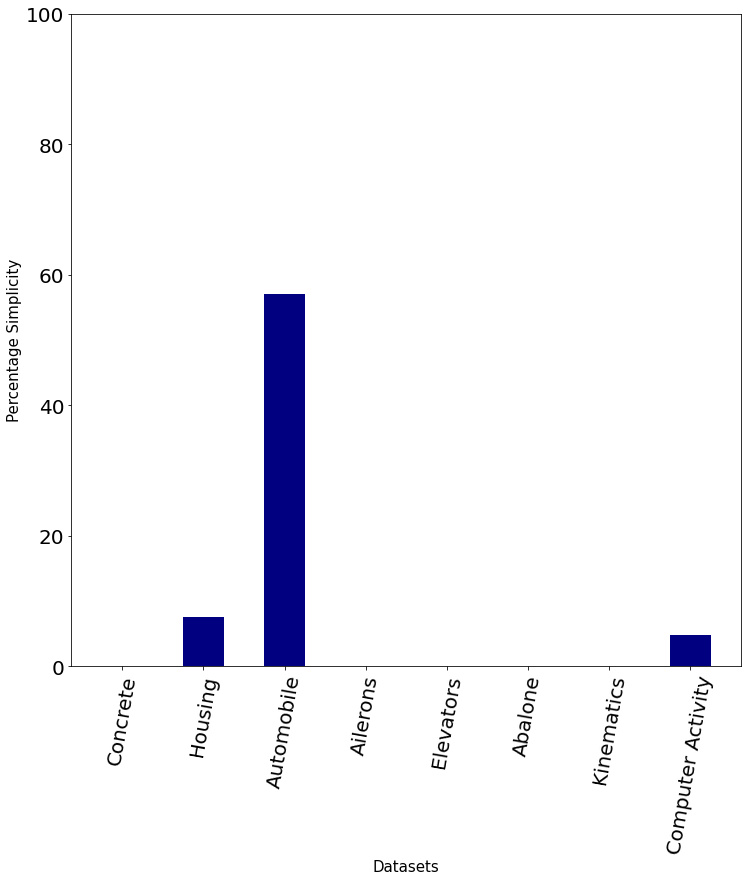

In [95]:
dict_corr_80 = {'Concrete': 0, 'Housing': 7.6, 'Automobile': 57, 'Ailerons': 0, 'Elevators': 0, 'Abalone': 0, 'Kinematics': 0, 'Computer Activity': 4.7}
dict_corr_60 = {'Concrete': 0, 'Housing': 15.3, 'Automobile': 57, 'Ailerons': 0, 'Elevators': 0, 'Abalone': 75, 'Kinematics': 0, 'Computer Activity': 38}

width = 0.5

plt.figure(figsize=(12,12))

plt.bar(dict_corr_80.keys(), dict_corr_80.values(), width, color='navy')
plt.xticks(rotation=80, fontsize = 20)
plt.yticks(np.arange(0, 120, 20), fontsize = 20)

plt.xlabel("Datasets", fontsize = 15)
plt.ylabel("Percentage Simplicity", fontsize = 15)

plt.savefig("Img_Percentage_Simplicity_80")
plt.show()

<Figure size 864x864 with 0 Axes>

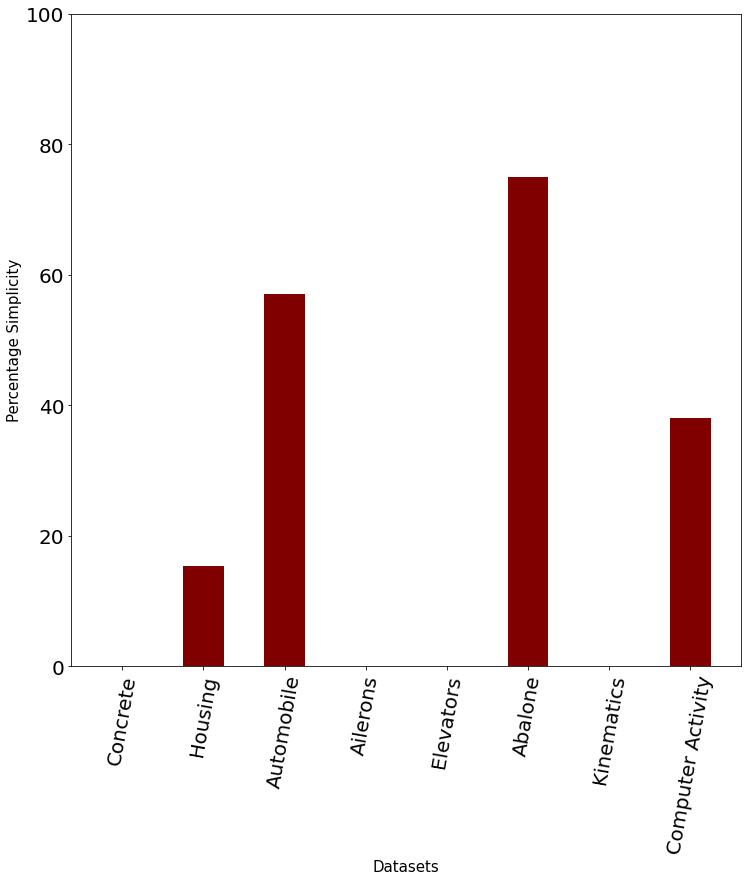

In [96]:
plt.figure(figsize=(12,12))

width = 0.5

plt.figure(figsize=(12,12))

plt.bar(dict_corr_60.keys(), dict_corr_60.values(), width, color='maroon')
plt.xticks(rotation=80, fontsize = 20)
plt.yticks(np.arange(0, 120, 20), fontsize = 20)

plt.xlabel("Datasets", fontsize = 15)
plt.ylabel("Percentage Simplicity", fontsize = 15)

plt.savefig("Img_Percentage_Simplicity_60")
plt.show()

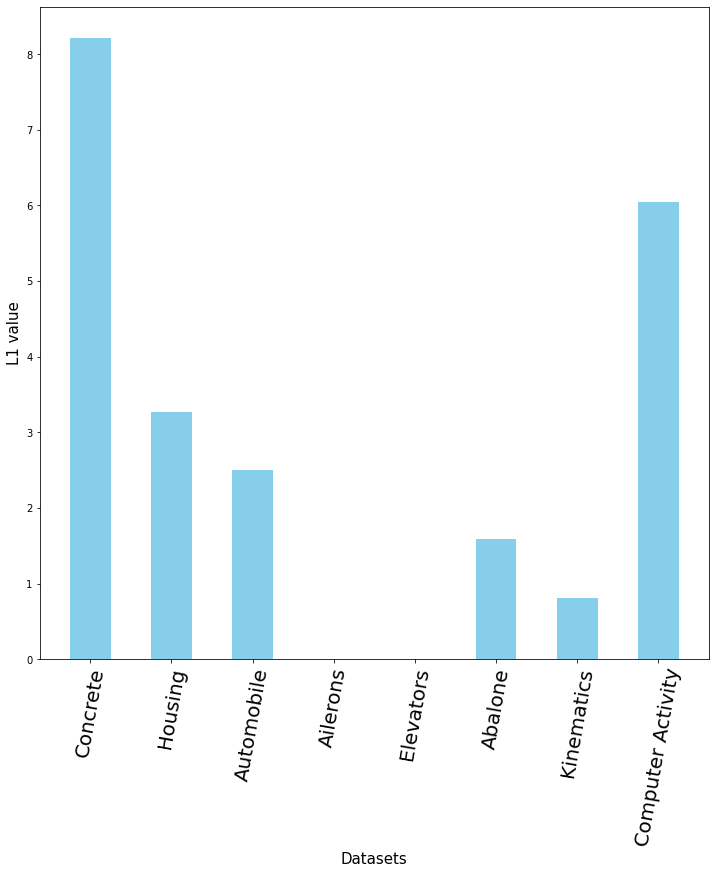

In [97]:
dict_L1 = {'Concrete': 8.2148, 'Housing': 3.2708, 'Automobile': 2.4993, 'Ailerons': 0.0001, 'Elevators': 0.0019, 'Abalone': 1.5843, 'Kinematics': 0.8078, 'Computer Activity': 6.0479}

width = 0.5

plt.figure(figsize=(12,12))


plt.bar(dict_L1.keys(), dict_L1.values(), width, color='skyblue')
plt.xticks(rotation=80, fontsize = 20)
# plt.yticks(np.arange(0, 120, 20), fontsize = 20)

plt.xlabel("Datasets", fontsize = 15)
plt.ylabel("L1 value", fontsize = 15)

plt.savefig("Img_L1_Value")
plt.show()

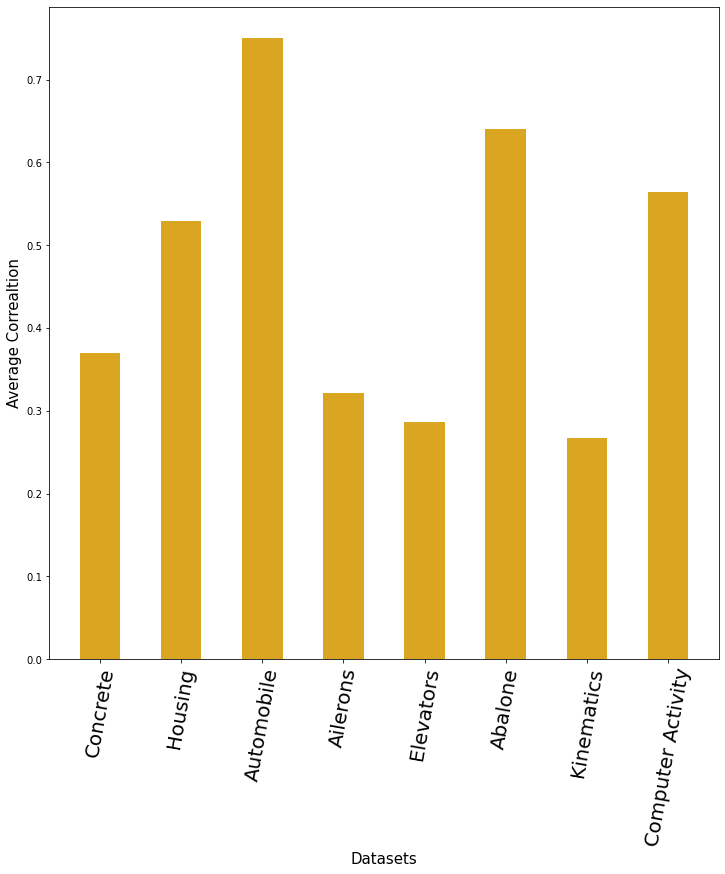

In [98]:
dict_corr_avg = {'Concrete': 0.3703, 'Housing': 0.5292, 'Automobile': 0.7505, 'Ailerons': 0.3217, 'Elevators': 0.2870, 'Abalone': 0.6410, 'Kinematics': 0.2675, 'Computer Activity': 0.5646 }

width = 0.5

plt.figure(figsize=(12,12))


plt.bar(dict_corr_avg.keys(), dict_corr_avg.values(), width, color='goldenrod')
plt.xticks(rotation=80, fontsize = 20)
# plt.yticks(np.arange(0, 120, 20), fontsize = 20)

plt.xlabel("Datasets", fontsize = 15)
plt.ylabel("Average Correaltion", fontsize = 15)

plt.savefig("Img_Avg_Correlation")
plt.show()

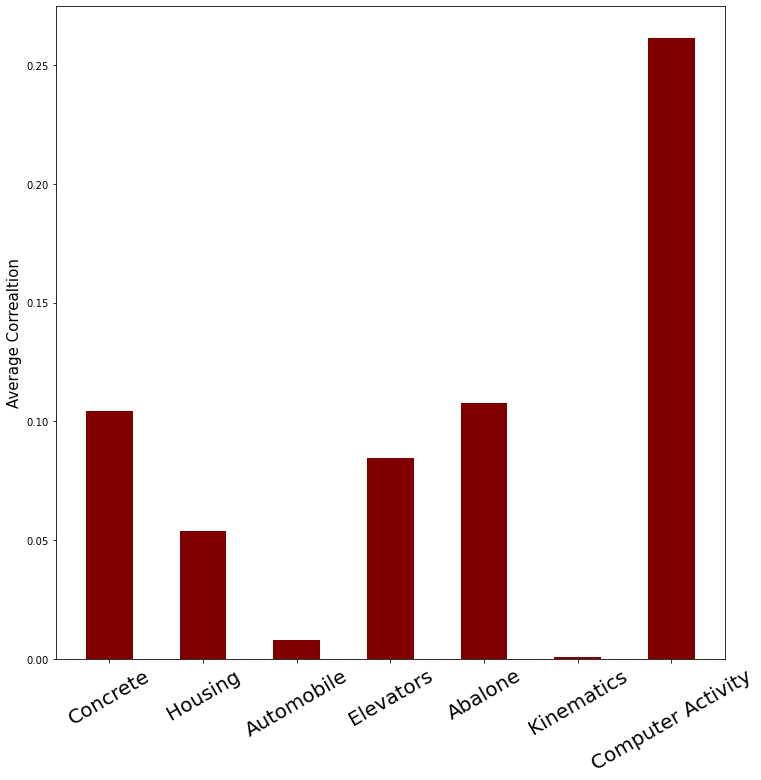

In [47]:
dict_corr_avg = {'Concrete': 0.1044, 'Housing': 0.05382, 'Automobile': 0.0080, 'Elevators': 0.0844, 'Abalone': 0.1079, 
                 'Kinematics': 0.00078, 'Computer Activity': 0.2617}


# 'Ailerons': 0.3217, , 'US Dataset': 0.1067

# 'Italian AQ': 0.0720, 'Beijing AQ': 0.0131,

width = 0.5

plt.figure(figsize=(12,12))


plt.bar(dict_corr_avg.keys(), dict_corr_avg.values(), width, color='maroon')
plt.xticks(rotation=30, fontsize = 20)
# plt.yticks(np.arange(0, 120, 20), fontsize = 20)

# plt.xlabel("Datasets", fontsize = 12)
plt.ylabel("Average Correaltion", fontsize = 15)

plt.savefig("Img_Avg_Correlation")
plt.show()

[0.0029805120366832253, 0.030569354222392053, 0.20565533053114254, 0.3225066870462362, 0.3989300726022163, 0.4123041650745128, 1.0]


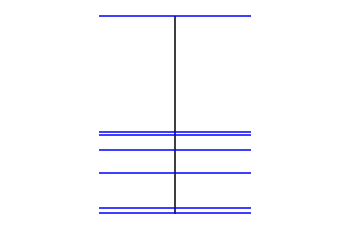

In [89]:
from matplotlib import pyplot as plt
import numpy as np

clist = [0.00078, 0.0080, 0.05382, 0.0844, 0.1044, 0.1079, 0.2617]
clist_norm = [float(i)/max(clist) for i in clist]
print(clist_norm)
# a = [1,2,5,6,9,11,15,17,18]

# plt.hlines(0,0,1)  # Draw a horizontal line
# plt.xlim(0,1)
# plt.ylim(0,0.5)

# y = np.ones(np.shape(clist_norm))   # Make all y values the same
# plt.plot(clist_norm, y,'|', ms = 40, linewidth = 40.0)  # Plot a line at each location specified in a
# plt.axis('off')
# plt.show()


plt.figure()
# a = [1,2,5,6,9,11,15,17,18]
plt.vlines(1,0,1)  # Draw a vertical line
clabels = ['Kinematics', 'Automobile', 'Housing', 'Elevators', 'Concrete', 'Abalone', 'C.Activity']
# plt.yticks(ticks = clist_norm, )
plt.eventplot(clist_norm, orientation='vertical', colors='b', linewidths = 1.5)
# plt.annotate('Kinematics', # this is the text
#                  (1.0,0.00078), # this is the point to label
#                  #textcoords="offset points", # how to position the text
#                  #xytext=(0,10), # distance from text to points (x,y)
#                  ha='right')
plt.axis('off')
plt.savefig("complexity_line_plot")
plt.show()

In [ ]:
Complex: Concrete, Housing, CompAct, Kinematics
Simple: Ailerons, Elevators, Auto

In [47]:
import networkx as nx

G = nx.DiGraph()
G.add_edge("x", "a", capacity=3.0)
G.add_edge("x", "b", capacity=1.0)
G.add_edge("a", "c", capacity=3.0)
G.add_edge("b", "c", capacity=5.0)
G.add_edge("b", "d", capacity=4.0)
G.add_edge("d", "e", capacity=2.0)
G.add_edge("c", "y", capacity=2.0)
G.add_edge("e", "y", capacity=3.0)

In [48]:
cut_value, partition = nx.minimum_cut(G, "x", "y")

In [49]:
partition

({'a', 'c', 'x'}, {'b', 'd', 'e', 'y'})

In [4]:
######################Library import ###########################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2 ###Import this for STrAdaBoost.R2
# from TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2 ###Import this for two-stage TrAdaBoost.R2

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

#Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
import matplotlib.lines as mlines

In [ ]:
'Concrete': 0.1044, 'Housing': 0.05382, 'Automobile': 0.0080, 'Ailerons': 0.3217, 'Elevators': 0.0844, 'Abalone': 0.1079, 
                 'Kinematics': 0.00078, 'Computer Activity': 0.2617 

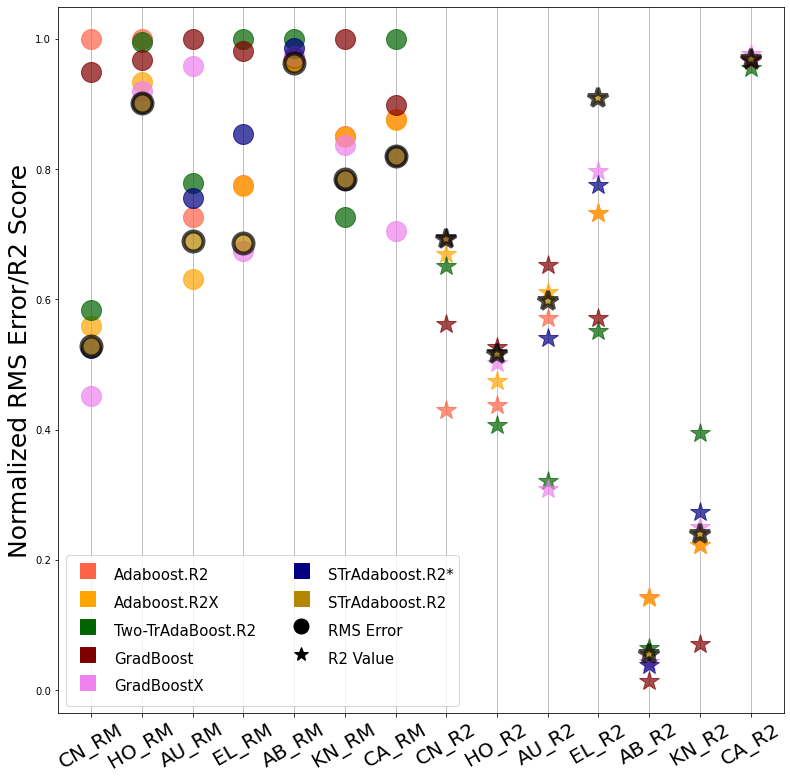

In [90]:
################## This is to plot the RMS Error and R2 Errors for the regression datasets###############

# Adaboost_RMSE_LM = [0.26038751897237, 5.0376683815286, 8.4791655169811, 0.0033471125695071, 3.0407609461728] #, 3.9425108551414]
# AdaboostX_RMSE_LM = [0.26023114662381, 4.378267959749, 7.919944333439, 0.0033427910557569, 3.0432585402816] #, 3.9366965210839]
# Tradaboost_RMSE_LM = [0.22266832507436, 5.3923052799087, 8.4363662781185, 0.0043199281964726, 3.1512572784609] #, ]
# GBR_RMSE_LM = [0.30639586904018, 6.931528128514, 8.2005217365166, 0.0042351215057175, 3.0554786083319] #, 4.0399359816106]
# GBRX_RMSE_LM = [0.25651722138106, 6.6421644634198, 7.7948724964471, 0.0029130548672265, 3.069247399311] #, 3.1676330049544]
# STradaboost_RMSE_LM = [0.24019505235318, 4.7747152432431, 7.6403915674999, 0.0029673107729298, 3.033956101467] #, 3.6857811572451]

Adaboost_RMSE_LM = [0.84984018, 0.72677601, 1., 0.77480745, 0.96493579]
AdaboostX_RMSE_LM = [0.84932981, 0.63164541, 0.93404762, 0.77380709, 0.96572837]
Tradaboost_RMSE_LM = [0.7267341,  0.77793889, 0.99495242, 1., 1.]
GBR_RMSE_LM = [1., 1., 0.96713783, 0.9803685, 0.9696062]
GBRX_RMSE_LM = [0.83720849, 0.95825399, 0.91929713, 0.67432946, 0.97397551]
STradaboost_RMSE_LM = [0.78393698, 0.6888402, 0.90107824, 0.68688891, 0.96277639]


Adaboost_R2_LM = [0.22271358624651, 0.57100313354671, 0.43788078031171, 0.73176163971293, 0.14354235486685] #, 0.97026804188298]
AdaboostX_R2_LM = [0.22297821480852, 0.61166393030941, 0.47400418460823, 0.73276743804607, 0.14185048998762] #, 0.97029209804207]
Tradaboost_R2_LM = [0.39414930585469, 0.32140504467159, 0.4076648365164, 0.55183056227661, 0.064264917777793] #, ]
GBR_R2_LM = [0.070113345388861, 0.65244131524098, 0.52741113186203, 0.57094634558134, 0.013838183023638] #, 0.96612489398277]
GBRX_R2_LM = [0.25061808483802, 0.30896214561578, 0.50210487214982, 0.79740507883259, 0.042394535657282] #, 0.97682152847771]
STradaboost_R2_LM = [0.24029499066992, 0.59803600978946, 0.51622360735125, 0.90838470486655, 0.055706541248261] #, 0.96874566723622]

# Adaboost_R2_LM = [0.56504878, 0.8751793, 0.83024562, 0.80556359, 1.]
# AdaboostX_R2_LM = [0.56572018, 0.9375003, 0.89873754, 0.80667082, 0.98821348]
# Tradaboost_R2_LM = [1., 0.49261909, 0.77295455, 0.60748553, 0.447707]
# GBR_R2_LM = [0.17788524, 1., 1., 0.62852924, 0.09640488]
# GBRX_R2_LM = [0.63584556, 0.47354779, 0.95201796, 0.8778275, 0.29534513]
# STradaboost_R2_LM = [0.60965474, 0.91661272, 0.97878785, 1., 0.38808435]


######################################################################################################################################################

# Adaboost_RMSE_MH = [0.24822159356433, 4.4410804054167, 0.51690158560036, 0.0033471526982521, 6.8975709686383] #, 2.6993846190505 ]
# AdaboostX_RMSE_MH = [0.24843890072296, 4.3803926480635, 7.9216075940794, 0.0033440852361765, 6.9008303649283] #, 2.772286253508]
# Tradaboost_RMSE_MH = [0.28774892734453, 5.360856013225, 7.8178471482743, 0.004323817446664, 7.9896066558025] #, 3.6570377514222]
# GBR_RMSE_MH = [0.19760513310911, 6.5400464761932, 7.8496330309718, 0.0042404945766187, 7.9067484042877] #, 2.0654797687271]
# GBRX_RMSE_MH = [0.16083149791428, 6.492341248115, 7.830640174917, 0.0029130548672265, 7.8103578223214] #, 2.1210128353453]
# STradaboost_RMSE_MH = [0.22068285334649, 4.32183291862, 3.139327044971, 0.0029673107729298, 7.1043595187502] #,3.4653868980023]

Adaboost_RMSE_MH = [0.86263256, 0.67905946, 0.06525211, 0.7741198, 0.86331797]
AdaboostX_RMSE_MH = [0.86338776, 0.66978005, 1., 0.77341037, 0.86372592]
Tradaboost_RMSE_MH = [1., 0.81969693, 0.98690159, 1., 1.]
GBR_RMSE_MH = [0.68672761, 1., 0.99091415, 0.98072933, 0.98962925]
GBRX_RMSE_MH = [0.55892997, 0.99270567, 0.98851655, 0.67372291, 0.97756475]
STradaboost_RMSE_MH = [0.7669285, 0.66082603, 0.39629924, 0.68627106, 0.88920016]

# RMSE_MH = np.array([Adaboost_RMSE_MH, AdaboostX_RMSE_MH, Tradaboost_RMSE_MH, GBR_RMSE_MH, GBRX_RMSE_MH, STradaboost_RMSE_MH]) 
# R2_LM = np.array([Adaboost_R2_LM, AdaboostX_R2_LM, Tradaboost_R2_LM, GBR_R2_LM, GBRX_R2_LM, STradaboost_R2_LM]) 

# print(RMSE_MH)
# print("\n")
# RMSE_MH = np.abs(RMSE_MH / RMSE_MH.max(axis=0))
# print(RMSE_MH)
# print("\n")
# print(RMSE_LM.transpose())


Adaboost_R2_MH = [0.2025168562006, 0.53419195857315, 0.40779226443498, 0.73191943931014, 0.13622418680961] #, 0.97916491957264]
AdaboostX_R2_MH = [0.20202013885999, 0.60832340309585, 0.47817437316266, 0.73276743804607, 0.14020392063643] #, 0.96615127710936]
Tradaboost_R2_MH = [0.088924703524272, 0.41637495514861, 0.47828155811508, 0.55183056227661, 0.037350559520466] #, 0.95498143627792]
GBR_R2_MH = [0.42799200850992, 0.27045185288114, 0.48970352059286, 0.57105386267691, 0.096512914820321] #, 0.97493916569013]
GBRX_R2_MH = [0.64843684209286, 0.34891021292423, 0.49760784524605, 0.79740507883259, 0.07762729100056] #, 0.97442438161888]
STradaboost_R2_MH = [0.32360915619155, 0.56191312539345, 0.8449380519317, 0.90838470486655, 0.072739750944493] #, 0.96386044871966]


######################################################################################################################################################

# Adaboost_RMSE_LH = [0.16781600843473, 4.5686900822772, 3.9513988575627, 0.0033471125695071, 3.1338169744931] #, 2.6979886274737]
# AdaboostX_RMSE_LH = [0.16759077896839, 3.4712586371919, 4.310478178893, 0.0033427910557569, 3.1380187981013] #, 2.6988088627822]
# Tradaboost_RMSE_LH = [0.21785422801672, 4.2477320040385, 5.0772773637948, 0.0043199281964726, 3.0262011934292] #, 3.3799966123362]
# GBR_RMSE_LH = [0.19506236290905, 4.2256670380595, 3.6369527534751, 0.0042351215057175, 2.86882177727] #, CPM ACTIVITY MISSING]
# GBRX_RMSE_LH = [0.16087723874659, 3.6255693434073, 4.1314282073083, 0.0029130548672265, 2.7282202974089] #, 2.3711626466495]
# STradaboost_RMSE_LH = [0.18562038457534, 3.5048747299387, 4.2466892458194, 0.0029673107729298, 0.18562038457534] #, 2.8878880022154]

Adaboost_RMSE_LH = [0.7703133, 1., 0.77825153, 0.77480745, 0.99866099]
AdaboostX_RMSE_LH = [0.76927944, 0.75979298, 0.84897434, 0.77380709, 1.]
Tradaboost_RMSE_LH = [1., 0.92974834, 1., 1., 0.96436681]
GBR_RMSE_LH = [0.8953802, 0.92491873, 0.71631949, 0.9803685, 0.91421434]
GBRX_RMSE_LH = [0.73846278, 0.79356868, 0.81370938, 0.67432946, 0.86940853]
STradaboost_RMSE_LH = [0.85203939, 0.7671509, 0.83641073, 0.68688891, 0.05915209]


# RMSE_LH = np.array([Adaboost_RMSE_LH, AdaboostX_RMSE_LH, Tradaboost_RMSE_LH, GBR_RMSE_LH, GBRX_RMSE_LH, STradaboost_RMSE_LH]) 
# R2_LM = np.array([Adaboost_R2_LM, AdaboostX_R2_LM, Tradaboost_R2_LM, GBR_R2_LM, GBRX_R2_LM, STradaboost_R2_LM]) 

# print(RMSE_LH)
# print("\n")
# RMSE_LH = np.abs(RMSE_LH / RMSE_LH.max(axis=0))
# print(RMSE_LH)
# print("\n")
# print(RMSE_LM.transpose())


Adaboost_R2_LH = [0.622283848787, 0.46524886681603, 0.70153328584469, 0.73176163971293, 0.1175469169484] #, 0.97916491957264]
AdaboostX_R2_LH = [0.62321540348897, 0.59162714947175, 0.67229581334993, 0.73276743804607, 0.11713087775234] #, 0.97914830369038]
Tradaboost_R2_LH = [0.40326889105691, 0.49183709477584, 0.57222257093668, 0.55183056227661, 0.072840090013919] #, 0.96885937244308]
GBR_R2_LH = [0.4481770492392, 0.51226199477099, 0.75494538096462, 0.57094634558134, 0.030740325582561] #, CPM ACTIVITY MISSING]
GBRX_R2_LH = [0.64843684209286, 0.58024645369689, 0.70013799442279, 0.79740507883259, 0.14618440337337] #, 0.98435182139215]
STradaboost_R2_LH = [0.52110318618814, 0.57658831335789, 0.67568321896659, 0.90838470486655, 0.087969472625386] #, 0.97884386193814]

#######################################################################################################################################################

#################################################### CUMULATIVE #############################################################################################
############## ['Concrete D', 'Housing', 'Auto', 'Ailerons', 'Elevators', 'Abalone', 'Kinematics', 'CompAct'] (L + M, H) ##############

# Adaboost_RMSE = [24.967402079557, 8.4791655169811, 5.0376683815286, 0.00020325265295854, 0.0033471125695071, 3.0407609461728, 0.26038751897237, 3.9425108551414]
# AdaboostX_RMSE = [13.964770123091, 7.919944333439, 4.378267959749, 0.00017441106284697, 0.0033427910557569, 3.0432585402816, 0.26023114662381, 3.9366965210839]
# Tradaboost_RMSE = [14.566200369473, 8.4363662781185, 5.3923052799087, 0.00021090634603080816, 0.0043199281964726, 3.1512572784609, 0.22266832507436, 4.496007445782896]
# GBR_RMSE = [23.681786685621, 8.2005217365166, 6.931528128514, 0.00018387473306345, 0.0042351215057175, 3.0554786083319, 0.30639586904018, 4.0399359816106]
# GBRX_RMSE = [11.269768327076, 7.7948724964471, 6.6421644634198, 0.0001611901826149, 0.0029130548672265, 3.069247399311, 0.25651722138106, 3.1676330049544]
# STradaboost_RMSE = [13.127525218737, 7.638244897910103, 5.2392486538122665, 0.0001795412822754839, 0.0036899511808519, 3.1082756610754023, 0.23972975088922271, 3.6865219512798]
# STradaboostAS_RMSE = [13.176714036197, 7.6403915674999, 4.7747152432431, 0.0001855532678034472, 0.0029673107729298, 3.033956101467, 0.24019505235318, 3.6857811572451]


Adaboost_R2 = [0.42967086924117, 0.43788078031171, 0.57100313354671, 0.73176163971293, 0.14354235486685, 0.22271358624651, 0.97026804188298] #0.74849469749676,
AdaboostX_R2 = [0.66902638848907, 0.47400418460823, 0.61166393030941, 0.73276743804607, 0.14185048998762, 0.22297821480852, 0.97029209804207] #0.81306444868016,
Tradaboost_R2 = [0.65055250676401, 0.4076648365164, 0.32140504467159, 0.55183056227661, 0.064264917777793, 0.39414930585469, 0.9555425657957418] #0.7283795591963251,
GBR_R2 = [0.56210100691435, 0.52741113186203, 0.65244131524098, 0.57094634558134, 0.013838183023638, 0.070113345388861, 0.96612489398277] #0.79328008730152,
GBRX_R2 = [0.69179304767866, 0.50210487214982, 0.30896214561578, 0.79740507883259, 0.042394535657282, 0.25061808483802, 0.97682152847771] #0.84035559831767,
STradaboost_R2 = [0.69443695471351, 0.5172617493422729, 0.540638454649814, 0.77575084511173, 0.038929530316638615, 0.27288855539318535, 0.96884785010965] #0.8142807738642427,
STradaboostAS_R2 = [0.69205154599719, 0.51622360735125, 0.59803600978946, 0.90838470486655, 0.055706541248261, 0.24029499066992, 0.96874566723622] #0.7283795591963251,


# RMSE_LM = np.array([Adaboost_RMSE, AdaboostX_RMSE,  Tradaboost_RMSE, GBR_RMSE, GBRX_RMSE, STradaboost_RMSE, STradaboostAS_RMSE]) 
# R2_LM = np.array([Adaboost_R2, AdaboostX_R2, Tradaboost_R2, GBR_R2, GBRX_R2, STradaboost_R2, STradaboostAS_R2]) 

# print(R2_LM)
# print("\n")
# R2_LM = np.abs(R2_LM / R2_LM.max(axis=0))
# print(R2_LM)
# print("\n")
# print(RMSE_LM.transpose())

Adaboost_RMSE = [1., 1., 0.72677601, 0.77480745, 0.96493579, 0.84984018, 0.87689153] #0.8667516,
AdaboostX_RMSE = [0.55932011, 0.93404762, 0.63164541, 0.77380709, 0.96572837, 0.84932981, 0.87559831] #0.82695977,
Tradaboost_RMSE = [0.58340873, 0.99495242, 0.77793889, 1., 1., 0.7267341, 1.] #1.,
GBR_RMSE = [0.94850824, 0.96713783, 1., 0.9803685, 0.9696062, 1., 0.89856079] #0.8718312,
GBRX_RMSE = [0.45137929, 0.91929713, 0.95825399, 0.67432946, 0.97397551, 0.83720849, 0.70454354] #0.76427374,
STradaboost_RMSE = [0.52578659, 0.90082507, 0.75585766, 0.85416956, 0.98636049, 0.78241835, 0.81995459] #0.8512844,
STradaboostAS_RMSE = [0.52775671, 0.90107824, 0.6888402, 0.68688891, 0.96277639, 0.78393698, 0.81978983] #0.87978987,


# Adaboost_R2 = [0.61873272, 0.83024562, 0.8751793, 0.80556359, 1., 0.56504878, 0.99329101] #0.89068806,
# AdaboostX_R2 = [0.96340839, 0.89873754, 0.9375003, 0.80667082, 0.98821348, 0.56572018, 0.99331564] #0.96752428,
# Tradaboost_R2 = [0.93680571, 0.77295455, 0.49261909, 0.60748553, 0.447707, 1., 0.97821612] #0.8667516,
# GBR_R2 = [0.80943418, 1., 1., 0.62852924, 0.09640488, 0.17788524, 0.98904955] #0.94398144,
# GBRX_R2 = [0.99619273, 0.95201796, 0.47354779, 0.8778275, 0.29534513, 0.63584556, 1.] #1.,
# STradaboost_R2 = [1., 0.98075622, 0.82863921, 0.85398933, 0.27120588, 0.69234818, 0.99183712] #0.96897168,
# STradaboostAS_R2 = [0.99656497, 0.97878785, 0.91661272, 1., 0.38808435, 0.60965474, 0.99173251] #0.8667516,


#######################################################################################################################################################


# Adaboost_RMSE = list(map(sum, zip(Adaboost_RMSE_LM, Adaboost_RMSE_LH, Adaboost_RMSE_MH)))
# Adaboost_RMSE[:] = [x / 3.0 for x in Adaboost_RMSE]

# AdaboostX_RMSE = list(map(sum, zip(AdaboostX_RMSE_LM, AdaboostX_RMSE_LH, AdaboostX_RMSE_MH)))
# AdaboostX_RMSE[:] = [x / 3.0 for x in AdaboostX_RMSE]
                      
# Tradaboost_RMSE = list(map(sum, zip(Tradaboost_RMSE_LM, Tradaboost_RMSE_LH, Tradaboost_RMSE_MH)))
# Tradaboost_RMSE[:] = [x / 3.0 for x in Tradaboost_RMSE]                       
                       
# GBR_RMSE = list(map(sum, zip(GBR_RMSE_LM, GBR_RMSE_LH, GBR_RMSE_MH)))
# GBR_RMSE[:] = [x / 3.0 for x in GBR_RMSE]
                
# GBRX_RMSE = list(map(sum, zip(GBRX_RMSE_LM, GBRX_RMSE_LH, GBRX_RMSE_MH)))
# GBRX_RMSE[:] = [x / 3.0 for x in GBRX_RMSE]
                 
# STradaboost_RMSE = list(map(sum, zip(STradaboost_RMSE_LM, STradaboost_RMSE_LH, STradaboost_RMSE_MH)))
# STradaboost_RMSE[:] = [x / 3.0 for x in STradaboost_RMSE]
                        
                    
# Adaboost_R2 = list(map(sum, zip(Adaboost_R2_LM, Adaboost_R2_LH, Adaboost_R2_MH)))
# Adaboost_R2[:] = [x / 3.0 for x in Adaboost_R2]
                        
# AdaboostX_R2 = list(map(sum, zip(AdaboostX_R2_LM, AdaboostX_R2_LH, AdaboostX_R2_MH)))
# AdaboostX_R2[:] = [x / 3.0 for x in AdaboostX_R2]
                        
# Tradaboost_R2 = list(map(sum, zip(Tradaboost_R2_LM, Tradaboost_R2_LH, Tradaboost_R2_MH)))
# Tradaboost_R2[:] = [x / 3.0 for x in Tradaboost_R2]
                        
# GBR_R2 = list(map(sum, zip(GBR_R2_LM, GBR_R2_LH, GBR_R2_MH)))
# GBR_R2[:] = [x / 3.0 for x in GBR_R2]
                        
# GBRX_R2 = list(map(sum, zip(GBRX_R2_LM, GBRX_R2_LH, GBRX_R2_MH)))
# GBRX_R2[:] = [x / 3.0 for x in GBRX_R2]
                        
# STradaboost_R2 = list(map(sum, zip(STradaboost_R2_LM, STradaboost_R2_LH, STradaboost_R2_MH)))
# STradaboost_R2[:] = [x / 3.0 for x in STradaboost_R2]                        


#xlabels = ['Kinematics', 'Auto', 'Housing', 'Elevators', 'Abalone'] #, 'C.Activity']
# xlabels = ['Concrete', 'Housing', 'Auto', 'Ailerons', 'Elevators', 'Abalone', 'Kinematics', 'CompAct']
xlabels_RM = ['CN_RM', 'H_RM', 'AU_RM', 'E_RM', 'AB_RM', 'KN_RM', 'CM_RM']
xlabels_R2 = ['CN_R2', 'H_R2', 'AU_R2', 'E_R2', 'AB_R2', 'KN_R2', 'CM_R2']
# xlabels = ['Kinematics', 'Auto', 'Housing', 'Elevators', 'Concrete', 'Abalone', 'Computer Activity', 'Ailerons']

Adaboost = mlines.Line2D([], [], color = 'tomato', marker = 's', linestyle = 'None', markersize = 15, label = 'Adaboost.R2')
AdaboostX = mlines.Line2D([], [], color = 'orange', marker = 's', linestyle = 'None', markersize = 15, label = 'Adaboost.R2X')
Tradaboost = mlines.Line2D([], [], color = 'darkgreen', marker = 's', linestyle = 'None', markersize = 15, label = 'Two-TrAdaBoost.R2')
GBR = mlines.Line2D([], [], color = 'maroon', marker = 's', linestyle = 'None', markersize = 15, label = 'GradBoost')
GBRX = mlines.Line2D([], [], color = 'violet', marker = 's', linestyle = 'None', markersize = 15, label = 'GradBoostX')
STradaboost_ = mlines.Line2D([], [], color = 'navy', marker = 's', linestyle = 'None', markersize = 15, label = 'STrAdaboost.R2*')
STradaboost = mlines.Line2D([], [], color = '#b58500', marker = 's', linestyle = 'None', markersize = 15, label = 'STrAdaboost.R2')
RMS = mlines.Line2D([], [], color = 'black', marker = 'o', linestyle = 'None', markersize = 15, label = 'RMS Error')
R2 = mlines.Line2D([], [], color = 'black', marker = '*', linestyle = 'None', markersize = 15, label = 'R2 Value')
CN = mlines.Line2D([], [], color = 'black', marker = r"$ {CN} $", linestyle = 'None', markersize = 15, label = 'Concrete')
HO = mlines.Line2D([], [], color = 'black', marker = r"$ {HO} $", linestyle = 'None', markersize = 15, label = 'Housing')
AU = mlines.Line2D([], [], color = 'black', marker = r"$ {AU} $", linestyle = 'None', markersize = 15, label = 'Automobile')
EL = mlines.Line2D([], [], color = 'black', marker = r"$ {EL} $", linestyle = 'None', markersize = 15, label = 'Elevators')
AB = mlines.Line2D([], [], color = 'black', marker = r"$ {AB} $", linestyle = 'None', markersize = 15, label = 'Abalone')
KN = mlines.Line2D([], [], color = 'black', marker = r"$ {KN} $", linestyle = 'None', markersize = 15, label = 'Kinematics')
CA = mlines.Line2D([], [], color = 'black', marker = r"$ {CA} $", linestyle = 'None', markersize = 15, label = 'Computer Activity')



plt.figure(figsize=(13,13))
plt.plot(xlabels_RM, Adaboost_RMSE, marker = 'o', color = 'tomato', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
plt.plot(xlabels_R2, Adaboost_R2, marker = '*', color = 'tomato', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)

plt.plot(xlabels_RM, AdaboostX_RMSE, marker = 'o', color = 'orange', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
plt.plot(xlabels_R2, AdaboostX_R2, marker = '*', color = 'orange', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)

plt.plot(xlabels_RM, Tradaboost_RMSE, marker = 'o', color = 'darkgreen', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
plt.plot(xlabels_R2, Tradaboost_R2, marker = '*', color = 'darkgreen', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)

plt.plot(xlabels_RM, GBR_RMSE, marker = 'o', color = 'maroon', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
plt.plot(xlabels_R2, GBR_R2, marker = '*', color = 'maroon', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)

plt.plot(xlabels_RM, GBRX_RMSE, marker = 'o', color = 'violet', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
plt.plot(xlabels_R2, GBRX_R2, marker = '*', color = 'violet', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)

plt.plot(xlabels_RM, STradaboost_RMSE, marker = 'o', color = 'navy', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
plt.plot(xlabels_R2, STradaboost_R2, marker = '*', color = 'navy', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)

plt.plot(xlabels_RM, STradaboostAS_RMSE, marker = 'o', color = '#b58500', markeredgewidth = 4.0, markeredgecolor ='black', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
plt.plot(xlabels_R2, STradaboostAS_R2, marker = '*', color = '#b58500', markeredgewidth = 4.0, markeredgecolor ='black', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)


plt.grid(axis = 'x')


#labels = ['Kinematics', 'Auto', 'Housing', 'Elevators', 'Abalone'] #, 'C.Activity']
# labels = ['Concrete', 'Housing', 'Auto', 'Ailerons', 'Elevators', 'Abalone', 'Kinematics', 'CompAct']
# labels = ['CN_RM', 'CN_R2', 'H_RM', 'H_R2', 'AU_RM', 'AU_R2', 'AI_RM', 'AI_R2', 'E_RM', 'E_R2', 'AB_RM', 'AB_R2', 'KN_RM', 'KN_R2', 'CM_RM', 'CM_R2']
labels = ['CN_RM', 'HO_RM', 'AU_RM', 'EL_RM', 'AB_RM', 'KN_RM', 'CA_RM', 'CN_R2', 'HO_R2', 'AU_R2', 'EL_R2', 'AB_R2', 'KN_R2', 'CA_R2']
# x_val = [0,1,2,3,4,5]
# x_val = [0,1,2,3,4,5,6,7]
x_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

plt.xticks(x_val, labels, rotation = 30, fontsize = 20)
# plt.yticks(np.arange(3, 7, 1.0), fontsize = 15)

plt.ylabel('Normalized RMS Error/R2 Score', fontsize = 25)
# plt.xlabel('Datasets (Decreasing Order of Complexity)', fontsize = 20)

plt.legend(handles= [Adaboost, AdaboostX, Tradaboost, GBR, GBRX, STradaboost_, STradaboost, RMS, R2], fontsize = 15, 
           ncol = 2, handleheight = 2.4, labelspacing = 0.05, loc='lower left') #, CN, HO, AU, EL, AB, KN, CA
# plt.legend(handles= [Adaboost, AdaboostX, Tradaboost, GBR, GBRX, STradaboost_, STradaboost], fontsize = 15, loc='lower left')


# plt.title('UCI Auto MPG dataset', fontsize = 28)
plt.savefig("regression_plot_rmse_r2")
plt.show()


# plt.figure(figsize=(13,13))
# plt.plot(xlabels, Adaboost_R2, marker = 'o', color = 'tomato', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
# plt.plot(xlabels, AdaboostX_R2, marker = 'o', color = 'orange', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
# plt.plot(xlabels, Tradaboost_R2, marker = 'o', color = 'darkgreen', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
# plt.plot(xlabels, GBR_R2, marker = 'o', color = 'maroon', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
# plt.plot(xlabels, GBRX_R2, marker = 'o', color = 'violet', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
# plt.plot(xlabels, STradaboost_R2, marker = 'o', color = 'navy', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
# plt.plot(xlabels, STradaboostAS_R2, marker = 'o', color = '#b58500', linewidth = 4.0, markersize = 20, linestyle = "None", alpha = .7)
# plt.grid(axis = 'x')

# labels = ['Concrete', 'Housing', 'Auto', 'Ailerons', 'Elevators', 'Abalone', 'Kinematics', 'CompAct']
# x_val = [0,1,2,3,4,5,6,7]

# plt.xticks(x_val, labels, rotation = 30, fontsize = 30)
# # plt.yticks(np.arange(3, 7, 1.0), fontsize = 15)

# plt.ylabel('R2 Score', fontsize = 30)
# # plt.xlabel('Datasets (Decreasing Order of Complexity)', fontsize = 20)

# plt.legend(handles= [Adaboost, AdaboostX, Tradaboost, GBR, GBRX, STradaboost_, STradaboost], fontsize = 15)

# # plt.title('UCI Auto MPG dataset', fontsize = 28)
# # plt.savefig("ComplexityPlot_R2_Paper")
# plt.show()

In [11]:
########################################## Shorter Individual Datasets (US) ###############################################################

US_df_train = pd.read_csv('US_data/Train/Train_3.csv')
US_train_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'Latitude', 'Longitude', 'year', 'month', 'rid', 'clust']
US_df_train = US_df_train.drop(US_train_droplist, axis = 1)
US_df_train = US_df_train.rename(columns={"is": "ISS"})
print(US_df_train.shape)

US_df_transfer = pd.read_csv('US_data/Transfer/Transfer_3.csv')
US_transfer_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'Latitude', 'Longitude', 'year', 'month', 'rid', 'clust']
US_df_transfer = US_df_transfer.drop(US_transfer_droplist, axis = 1)
US_df_transfer = US_df_transfer.rename(columns={"is": "ISS"})
print(US_df_transfer.shape)

US_df_test = pd.read_csv('US_data/Test/Test_3.csv')
US_test_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'Latitude', 'Longitude', 'year', 'month', 'rid']
US_df_test = US_df_test.drop(US_test_droplist, axis = 1)
US_df_test = US_df_test.rename(columns={"is": "ISS"})
print(US_df_test.shape)

target_column = ['pm25_value']
US_df_train_y = US_df_train[target_column]
US_df_train_X = US_df_train.drop(target_column, axis = 1)

US_df_transfer_y = US_df_transfer[target_column]
US_df_transfer_X = US_df_transfer.drop(target_column, axis = 1)

US_df_test_y = US_df_test[target_column]
US_df_test_X = US_df_test.drop(target_column, axis = 1)

TF_train_X = pd.concat([US_df_transfer_X, US_df_train_X], sort= False)
TF_train_y = pd.concat([US_df_transfer_y, US_df_train_y], sort= False)

np_TF_train_X = TF_train_X.to_numpy()
np_TF_train_y = TF_train_y.to_numpy()

# np_TF_train_X = US_df_train_X.to_numpy()
# np_TF_train_y = US_df_train_y.to_numpy()

np_US_df_test_X = US_df_test_X.to_numpy()
np_US_df_test_y = US_df_test_y.to_numpy()

np_TF_train_y_list = np_TF_train_y.ravel()
np_US_df_test_y_list = np_US_df_test_y.ravel()



(153, 19)
(2856, 19)
(1310, 19)


In [8]:
## Get the Spearman Correlation Concrete for the features US: set 1

corr_US_df_test_X =  US_df_test_X.corr(method = 'spearman')
corr_US_df_test_X

US_df_test_X_lsum = np.tril(corr_US_df_test_X).sum() - np.trace(corr_US_df_test_X)
US_df_test_X_elems = len(corr_US_df_test_X) * (len(corr_US_df_test_X) - 1) / 2
US_df_test_X_lavg = abs(US_df_test_X_lsum / US_df_test_X_elems)
US_df_test_X_lavg

0.10676618966867393

In [10]:
## Get the Spearman Correlation Concrete for the features US: set 2

corr_US_df_test_X =  US_df_test_X.corr(method = 'spearman')
corr_US_df_test_X

US_df_test_X_lsum = np.tril(corr_US_df_test_X).sum() - np.trace(corr_US_df_test_X)
US_df_test_X_elems = len(corr_US_df_test_X) * (len(corr_US_df_test_X) - 1) / 2
US_df_test_X_lavg = abs(US_df_test_X_lsum / US_df_test_X_elems)
US_df_test_X_lavg

0.10710321411009029

In [12]:
## Get the Spearman Correlation Concrete for the features US: set 3

corr_US_df_test_X =  US_df_test_X.corr(method = 'spearman')
corr_US_df_test_X

US_df_test_X_lsum = np.tril(corr_US_df_test_X).sum() - np.trace(corr_US_df_test_X)
US_df_test_X_elems = len(corr_US_df_test_X) * (len(corr_US_df_test_X) - 1) / 2
US_df_test_X_lavg = abs(US_df_test_X_lsum / US_df_test_X_elems)
US_df_test_X_lavg

0.10564783161413803

In [91]:
importance_idx = modelRF.feature_importances_.argsort()
fig, axs = plt.subplots(figsize = (15, 15))
importance_idx

# plt.bar(indices, highPower, width=width, 
#         color='b', label='Max Power in mW')
# plt.bar([i+0.25*width for i in indices], lowPower, 
#         width=0.5*width, color='r', alpha=0.5, label='Min Power in mW')

# plt.xticks(indices+width/2., 
#            ['T{}'.format(i) for i in range(len(highPower))] )

# plt.legend()

# plt.show()

NameError: name 'modelRF' is not defined